In [57]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [18]:
# Directories - Change as desired
bca_file_path = "C:/Users/plutzer/Box/CellBio-MajorLab/Users/Isaac/Lab Notebook/Lab_data/BCA_IBP_20210629_120604.xlsx"
figure_base = bca_file_path[:len(bca_file_path)-5]

In [32]:
# load file
df = pd.read_excel(bca_file_path,header=11)
df = df.set_index('Unnamed: 0')
mat = df.to_numpy()
df.index.names = [' ']
df

,1,2,3,4,5,6,7,8,9,10,11,12
,,,,,,,,,,,,
A,1.869,2.450,1.198,1.119,1.025,1.181,NaN,NaN,NaN,NaN,NaN,NaN
B,2.193,1.906,2.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,1.634,1.467,1.502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,1.207,1.154,0.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,0.883,0.877,0.893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,0.533,0.484,0.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,0.333,0.315,0.148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,0.109,0.102,0.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Plate setup

# Standards go in the first n cols, using all the rows as shown below
row_order = ['A','B','C','D','E','F','G','H']

##### STANDARDS - listed in ug/mL ##### 
standards = {
    'A':2000,
    'B':1500,
    'C':1000,
    'D':750,
    'E':500,
    'F':250,
    'G':125,
    'H':0
}

# Change if needed
num_standard_reps = 3

# Positions of samples
samples_positions = [
    [[0,3],[0,4],[0,5]]
]

# Sample names corresponding to the above positions
samples_names = [
    'HEK293T test'
]

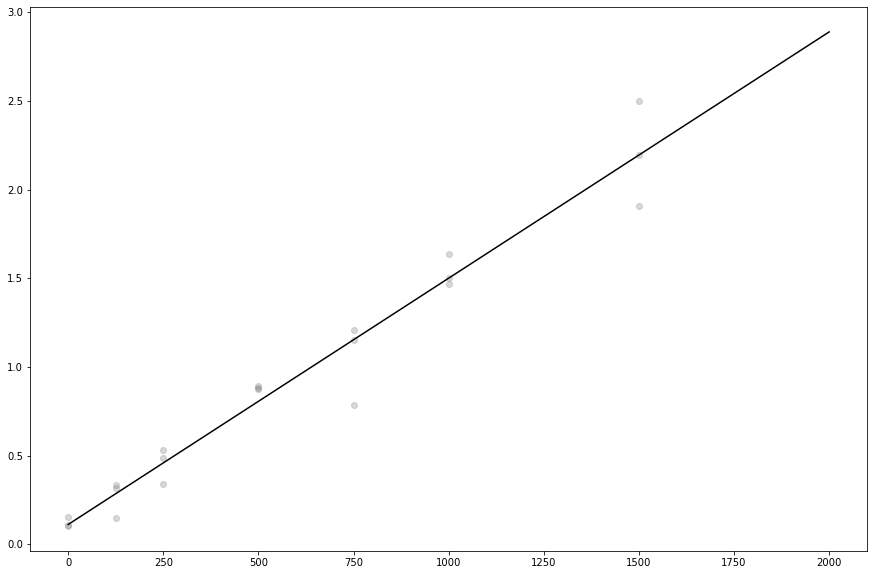

In [58]:
# Add standards to ignore if you have some outliers
ignore = ['A']

# Generate points for the standard curve
concentrations_x = []
absorbances_y = []
for row in range(len(row_order)):
    if row_order[row] not in ignore:
        concentration = standards[row_order[row]]
        for col in range(num_standard_reps):
            concentrations_x.append(concentration)
            absorbances_y.append(mat[row,col])

# Scatterplot of points
plt.figure(figsize = (15,10))
plt.scatter(concentrations_x,absorbances_y,c='grey',alpha=0.3)

# Add a linear regression
slope,intercept,r_val,pval,std_err = linregress(concentrations_x,absorbances_y)
plt.plot([0,2000],[intercept,intercept+slope*2000],c='black')

# Make interpolations for the samples
for samplenum in range(len(sample_positions)):
    sample_name = sample_names[sample_num]
    sample_abs = []
    for replicate in sample_positions[samplenum]:
        

In [34]:
mat[1,2]

2.5

In [55]:
list(standards.keys())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']